In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import random

In [2]:
np.random.seed(52)

In [3]:
df = pd.read_csv('digit_data.csv')

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(df)
m, n = data.shape
print(m,n)


42000 785


In [7]:
np.random.shuffle(data) # shuffle before splitting into abc and training sets

In [8]:
#Creating Test Set
data_abc = data[0:1000].T
Y_abc = data_abc[0]
X_abc = data_abc[1:n]
X_abc = X_abc / 255.


In [9]:
#Creating Train Set
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
m_train

41000

In [11]:
X_train.shape

(784, 41000)

In [12]:
random_index = np.random.randint(0, 41000)
random_index

8597

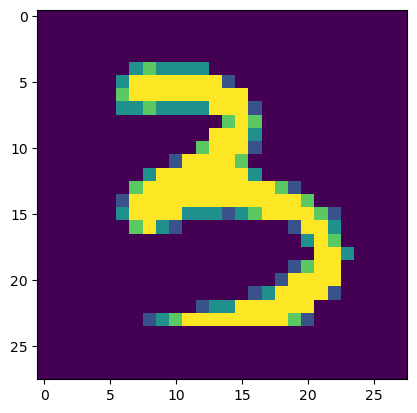

In [13]:
img = X_train.T[random_index]
img = np.reshape(img, (28,28))
plt.imshow(img)

In [14]:
Y_train[random_index]

3

**FUNTIONS**

1. Initialize parameters

In [15]:
def init_params():
#     # Number of nodes in the input layer
#     n_input = 784

#     # Number of nodes in the hidden layer
#     n_hidden = 10

#     # Number of nodes in the output layer
#     n_output = 10
    #Initialize weights and biases for the hidden layer
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5

    # Initialize weights and biases for the output layer
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

2. RELU

In [16]:
def ReLU(Z):
    return np.maximum(Z, 0)

3. SOFTMAX

In [17]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

4. RELU DERIVATIVE

In [18]:
def ReLU_deriv(Z):
    return Z > 0

5. Forward Propagation

In [19]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

6. One Hot

In [20]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

7. Backward Propagation

In [21]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

8.Update Parameters

In [22]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

9.Get predictions

In [23]:
def get_predictions(A2):
    return np.argmax(A2, 0)

10(a). Accuracy

In [24]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

10(b). Regularization

In [25]:
def dropout_forward(X, keep_prob):
    D = np.random.rand(*X.shape) < keep_prob
    A = X * D / keep_prob
    return A, D

def visualize_dropout(original_data, dropout_data, dropout_mask):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    axs[0].imshow(original_data.reshape(28, 28), cmap='gray')
    axs[0].set_title("Original Data")

    axs[1].imshow(dropout_mask.reshape(28, 28), cmap='gray')
    axs[1].set_title("Dropout Mask")

    axs[2].imshow(dropout_data.reshape(28, 28), cmap='gray')
    axs[2].set_title("Data with Dropout")

    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.show()




11. Gradient Descent

In [26]:
def gradient_descent(X, Y, alpha, iterations, keep_prob):
    W1, b1, W2, b2 = init_params()
    accuracy_scores = []
    for i in range(iterations):
        A, D = dropout_forward(X, keep_prob)
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, A)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, A, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))

    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)

    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    plt.show()

    return W1, b1, W2, b2

Iteration:  0
0.10365853658536585
Iteration:  10
0.14209756097560974
Iteration:  20
0.19351219512195122
Iteration:  30
0.23912195121951219
Iteration:  40
0.28509756097560973
Iteration:  50
0.3252926829268293
Iteration:  60
0.3546829268292683
Iteration:  70
0.38707317073170733
Iteration:  80
0.4130243902439024
Iteration:  90
0.43978048780487805
Iteration:  100
0.46539024390243905
Iteration:  110
0.4861463414634146
Iteration:  120
0.5085609756097561
Iteration:  130
0.5270243902439025
Iteration:  140
0.5456829268292683
Iteration:  150
0.5628048780487804
Iteration:  160
0.5751463414634146
Iteration:  170
0.591
Iteration:  180
0.6006341463414634
Iteration:  190
0.6173170731707317
Iteration:  200
0.6250487804878049
Iteration:  210
0.6342439024390244
Iteration:  220
0.6431219512195122
Iteration:  230
0.655609756097561
Iteration:  240
0.6619268292682927
Iteration:  250
0.6703170731707317
Iteration:  260
0.6742439024390244
Iteration:  270
0.6821951219512196
Iteration:  280
0.6888292682926829
It

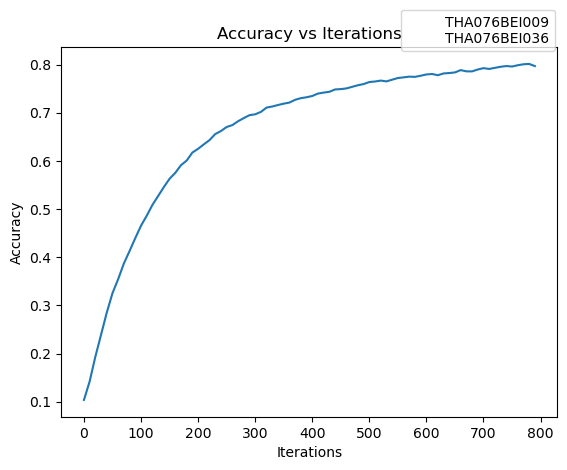

In [27]:
keep_prob = 0.7
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 800, keep_prob)

12. Make predictions

In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

13. Test Predictions

In [29]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


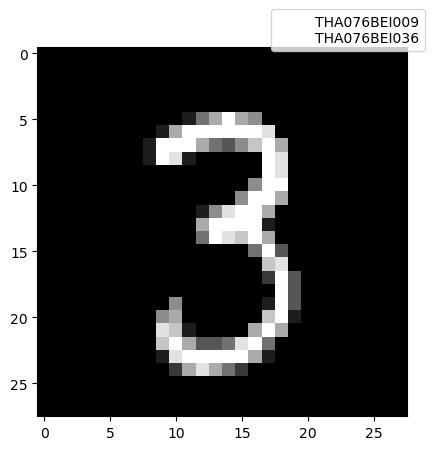

In [30]:
test_prediction(0, W1, b1, W2, b2)




Prediction:  [6]
Label:  4


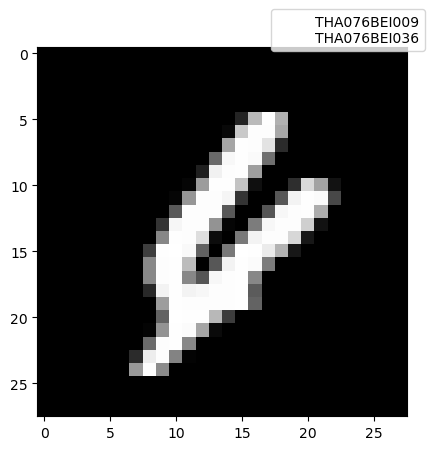

In [31]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [9]
Label:  4


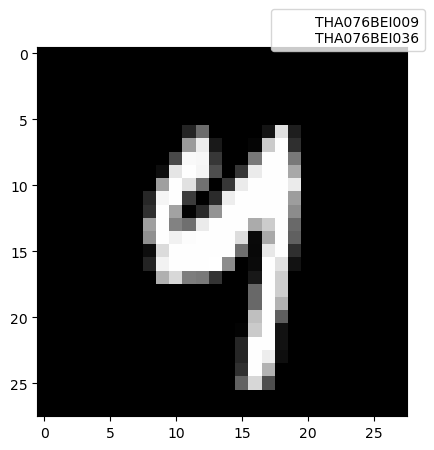

In [32]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


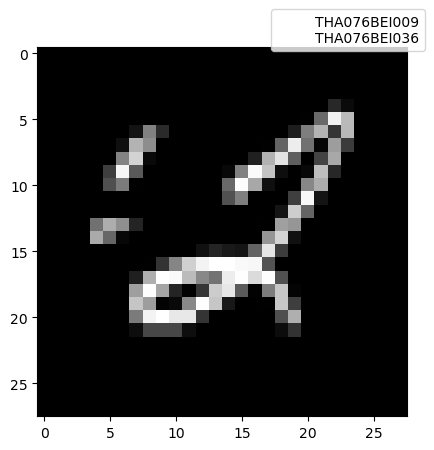

In [33]:
test_prediction(3, W1, b1, W2, b2)

In [34]:
abc_predictions = make_predictions(X_abc, W1, b1, W2, b2)
get_accuracy(abc_predictions, Y_abc)

0.871

In [35]:
from sklearn.metrics import classification_report

abc_predictions = make_predictions(X_abc, W1, b1, W2, b2)
report = classification_report(abc_predictions,Y_abc, digits=4)

print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0     0.9677    0.9375    0.9524        96
           1     0.9825    0.9032    0.9412       124
           2     0.9159    0.8991    0.9074       109
           3     0.8762    0.8598    0.8679       107
           4     0.9032    0.8485    0.8750        99
           5     0.7143    0.8333    0.7692        78
           6     0.9140    0.8586    0.8854        99
           7     0.8300    0.8830    0.8557        94
           8     0.7900    0.8681    0.8272        91
           9     0.7981    0.8058    0.8019       103

    accuracy                         0.8710      1000
   macro avg     0.8692    0.8697    0.8683      1000
weighted avg     0.8760    0.8710    0.8725      1000



9538


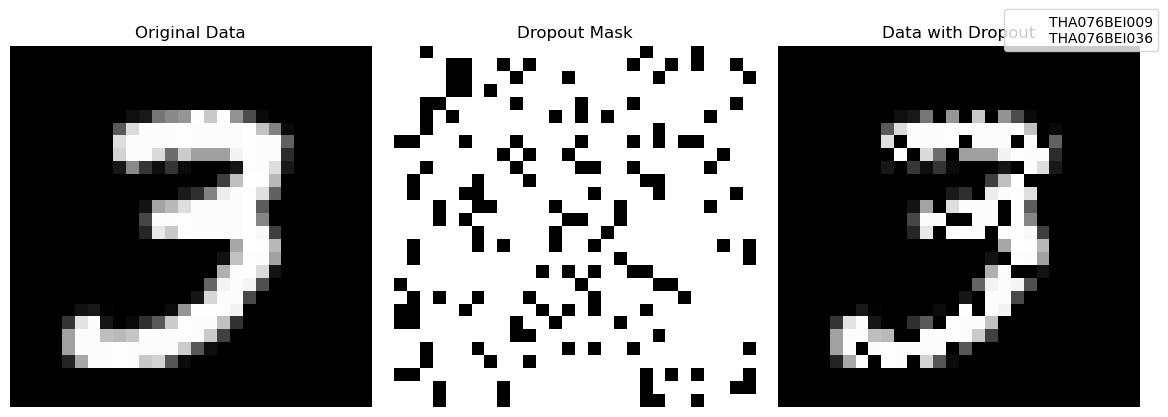

In [36]:
# Example usage
input_size, m = X_train.shape # Number of examples
X = X_train.copy()
keep_prob = 0.8

# Select a random example index for visualization
example_index = np.random.randint(0, m)
print(example_index)
example_data = X[:, example_index].reshape(input_size, 1)

A, D = dropout_forward(example_data, keep_prob)
visualize_dropout(example_data, A, D)